In [67]:
import pandas as pd
df = pd.read_csv('scraped_repos.csv')
df

# Gestion des doublons

In [49]:
df.duplicated().sum()

25

In [50]:
df.drop_duplicates()

,name,url,description,stars,created_at,language,forks,watchers,open_issues,owner
0,notflix,https://github.com/Bugswriter/notflix,Notflix is a shell script to search and stream...,1858,2022-01-01T11:11:25Z,Shell,184,1858,34,Bugswriter
1,netspy,https://github.com/shmilylty/netspy,netspy是一款快速探测内网可达网段工具深信服深蓝实验室天威战队强力驱动,1346,2022-01-01T14:20:27Z,Go,163,1346,3,shmilylty
2,ProxiTok,https://github.com/pablouser1/ProxiTok,Open source alternative frontend for TikTok ma...,1239,2022-01-01T19:08:33Z,PHP,104,1239,21,pablouser1
3,heirline.nvim,https://github.com/rebelot/heirline.nvim,Heirlinenvim is a nononsense Neovim Statusline...,720,2022-01-01T15:50:03Z,Lua,39,720,11,rebelot
4,jerboa,https://github.com/dessalines/jerboa,A native android app for Lemmy,690,2022-01-01T22:35:56Z,Kotlin,140,690,174,dessalines
...,...,...,...,...,...,...,...,...,...,...
48654,CS-Beacon-Notifier,https://github.com/lynxbinz/CS-Beacon-Notifier,A Cobalt Strike Beacon Notifier Via Telegram Bot,13,2022-12-31T04:26:37Z,Python,2,13,1,lynxbinz
48655,notebooks,https://github.com/dmarx/notebooks,misc notebooks i wanted to put in tracking,12,2022-12-31T09:52:47Z,Jupyter Notebook,2,12,8,dmarx
48656,qb-vehicleshop,https://github.com/qbcore-framework/qb-vehicle...,no description available,12,2022-12-31T17:28:37Z,Lua,37,12,21,qbcore-framework
48657,violetit,https://github.com/nogw/violetit,Violetit is a Reddit clone developed as a mono...,12,2022-12-31T14:01:43Z,TypeScript,0,12,24,nogw


# Gestion des valeurs manquantes

In [61]:
cn = df.loc[(df['language'].isna())]

In [62]:
df = df.drop(cn.index)
df.to_csv('scraped_repos.csv', index=False)

In [44]:
import csv

def fill_missing_descriptions(file_path):
    filled_rows = []
    
    # Lecture de notre fichier csv 
    with open(file_path, 'r', encoding='utf-8-sig') as csv_file:
        reader = csv.DictReader(csv_file)
        fieldnames = reader.fieldnames
        
        # Iteration sur chaque ligne
        for row in reader:
            # vérifier si la description est null
            if not row['description']:
                # Remplissage 
                row['description'] = 'no description available'
            
            # Append la ligne modifiée
            filled_rows.append(row)
    
    # Ecrire les lignes modifiées dans notre fichier csv
    with open(file_path, 'w', newline='', encoding='utf-8-sig') as csv_file:
        writer = csv.DictWriter(csv_file, fieldnames=fieldnames)
        writer.writeheader()
        writer.writerows(filled_rows)

# le path du fichier
file_path = 'scraped_repos.csv'

# appel de la fonction de remplissage
fill_missing_descriptions(file_path)


In [76]:
print(df.isnull().sum(axis=0))

name           0
url            0
description    0
stars          0
created_at     0
language       0
forks          0
open_issues    0
owner          0
dtype: int64


In [69]:
df.drop('watchers', axis=1, inplace=True)
df

,name,url,description,stars,created_at,language,forks,open_issues,owner
0,notflix,https://github.com/Bugswriter/notflix,Notflix is a shell script to search and stream...,1858,2022-01-01T11:11:25Z,Shell,184,34,Bugswriter
1,netspy,https://github.com/shmilylty/netspy,netspy是一款快速探测内网可达网段工具深信服深蓝实验室天威战队强力驱动,1346,2022-01-01T14:20:27Z,Go,163,3,shmilylty
2,ProxiTok,https://github.com/pablouser1/ProxiTok,Open source alternative frontend for TikTok ma...,1239,2022-01-01T19:08:33Z,PHP,104,21,pablouser1
3,heirline.nvim,https://github.com/rebelot/heirline.nvim,Heirlinenvim is a nononsense Neovim Statusline...,720,2022-01-01T15:50:03Z,Lua,39,11,rebelot
4,jerboa,https://github.com/dessalines/jerboa,A native android app for Lemmy,690,2022-01-01T22:35:56Z,Kotlin,140,174,dessalines
...,...,...,...,...,...,...,...,...,...
48648,CS-Beacon-Notifier,https://github.com/lynxbinz/CS-Beacon-Notifier,A Cobalt Strike Beacon Notifier Via Telegram Bot,13,2022-12-31T04:26:37Z,Python,2,1,lynxbinz
48649,notebooks,https://github.com/dmarx/notebooks,misc notebooks i wanted to put in tracking,12,2022-12-31T09:52:47Z,Jupyter Notebook,2,8,dmarx
48650,qb-vehicleshop,https://github.com/qbcore-framework/qb-vehicle...,no description available,12,2022-12-31T17:28:37Z,Lua,37,21,qbcore-framework
48651,violetit,https://github.com/nogw/violetit,Violetit is a Reddit clone developed as a mono...,12,2022-12-31T14:01:43Z,TypeScript,0,24,nogw


# Suppression des emoji

In [43]:
import re

# definition de notre fonction
def clean_description(description):
    if isinstance(description, str):
        cleaned_text = re.sub(r'[^\w\s]', '', description)
        cleaned_text = re.sub(r'\s+', ' ', cleaned_text)
        return cleaned_text.strip()
    else:
        return description

# chargement des données de notre dataframe
df = pd.read_csv('scraped_repos.csv')

# application de fonction clean_description
df['description'] = df['description'].apply(clean_description)


# Traduction des descriptions

In [65]:
import csv
import time
from translate import Translator
import langdetect

def translate_with_retry(description):
    translator = Translator(to_lang='en', from_lang=langdetect.detect(description))
    return translator.translate(description)
# fonction de detection de langue
def is_english(text):
    try:
        lang = langdetect.detect(text)
        return lang == 'en'
    except langdetect.LangDetectException:
        return False

input_file = 'scraped_repos.csv'

with open(input_file, 'r', newline='', encoding='utf-8') as file:
    reader = csv.DictReader(file)
    translated_lines = []
    for index, line in enumerate(reader):
        description = line['description']

        if isinstance(description, float):
            description = str(description)

        if description and description.strip():  
            if not is_english(description):
                try:
                    # Traduction
                    translated_description = translate_with_retry(description)
                    line['description'] = translated_description
                except Exception as e:
                    print(f"Translation failed for description at index {index}: {description}. Error: {str(e)}")
                time.sleep(0.5)  # on a ajouter un time sleep pour ne pas avoir l'erreure 429
            else:
                print(f"Skipping translation for description at index {index} as it is already in English.")
        else:
            print(f"Skipping translation for empty or whitespace-only description at index {index}.")

        translated_lines.append(line)

output_file = 'translated_repos.csv'

with open(output_file, 'w', newline='', encoding='utf-8') as file:
    fieldnames = ['name', 'url', 'description', 'stars', 'created_at', 'language', 'forks', 'watchers', 'open_issues', 'owner']
    writer = csv.DictWriter(file, fieldnames=fieldnames)
    writer.writeheader()
    writer.writerows(translated_lines)

print('Translated lines saved successfully to repositories_translated.csv!')


Skipping translation for description at index 0 as it is already in English.
Skipping translation for description at index 2 as it is already in English.
Skipping translation for description at index 3 as it is already in English.
Skipping translation for description at index 4 as it is already in English.
Skipping translation for description at index 5 as it is already in English.
Skipping translation for description at index 6 as it is already in English.
Skipping translation for description at index 7 as it is already in English.
Skipping translation for description at index 8 as it is already in English.
Skipping translation for description at index 9 as it is already in English.
Skipping translation for description at index 10 as it is already in English.
Skipping translation for description at index 12 as it is already in English.
Skipping translation for description at index 13 as it is already in English.
Skipping translation for description at index 17 as it is already in Engl

KeyboardInterrupt: 

In [77]:
dtf = pd.read_csv('translated_repos.csv')
dtf

,name,url,description,stars,created_at,language,forks,watchers,open_issues,owner
0,notflix,https://github.com/Bugswriter/notflix,Notflix is a shell script to search and stream...,1858,2022-01-01T11:11:25Z,Shell,184,1858,34,Bugswriter
1,netspy,https://github.com/shmilylty/netspy,netspy is a rapid detection of intranet networ...,1346,2022-01-01T14:20:27Z,Go,163,1346,3,shmilylty
2,ProxiTok,https://github.com/pablouser1/ProxiTok,Open source alternative frontend for TikTok ma...,1239,2022-01-01T19:08:33Z,PHP,104,1239,21,pablouser1
3,heirline.nvim,https://github.com/rebelot/heirline.nvim,Heirline.nvim is a no-nonsense Neovim Statusli...,720,2022-01-01T15:50:03Z,Lua,39,720,11,rebelot
4,jerboa,https://github.com/dessalines/jerboa,A native android app for Lemmy,690,2022-01-01T22:35:56Z,Kotlin,140,690,174,dessalines
...,...,...,...,...,...,...,...,...,...,...
42173,EspUsbHost,https://github.com/tanakamasayuki/EspUsbHost,Library for using USB Host with ESP32,13,2022-12-31T10:35:35Z,C++,3,13,2,tanakamasayuki
42174,CS-Beacon-Notifier,https://github.com/lynxbinz/CS-Beacon-Notifier,A Cobalt Strike Beacon Notifier Via Telegram Bot.,13,2022-12-31T04:26:37Z,Python,2,13,1,lynxbinz
42175,notebooks,https://github.com/dmarx/notebooks,misc notebooks i wanted to put in tracking,12,2022-12-31T09:52:47Z,Jupyter Notebook,2,12,8,dmarx
42176,violetit,https://github.com/nogw/violetit,Violetit is a Reddit clone developed as a mono...,12,2022-12-31T14:01:43Z,TypeScript,0,12,24,nogw


# Gestion des valeurs aberrantes/extrêmes

<Axes: >

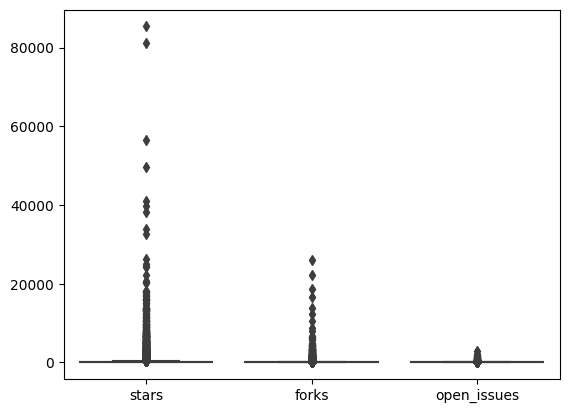

In [71]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.boxplot(df)

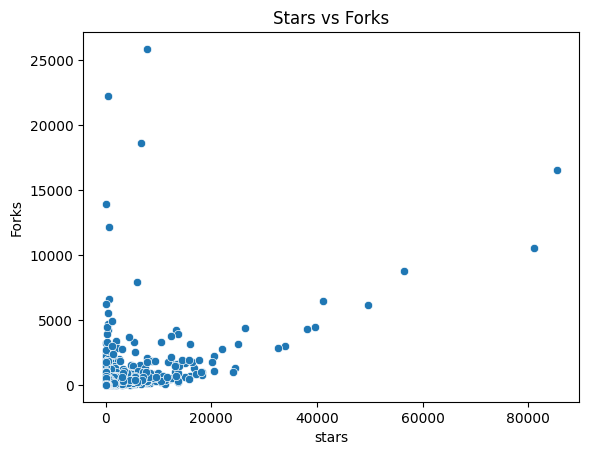

In [72]:
sns.scatterplot(x='stars', y='forks', data=df)
plt.xlabel('stars')
plt.ylabel('Forks')
plt.title('Stars vs Forks')
plt.show()